In [1]:
!pip install geopandas
!pip install contextily
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 21.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Required Libraries
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt
from contextily import add_basemap
import contextily as cx

EPSG:4490


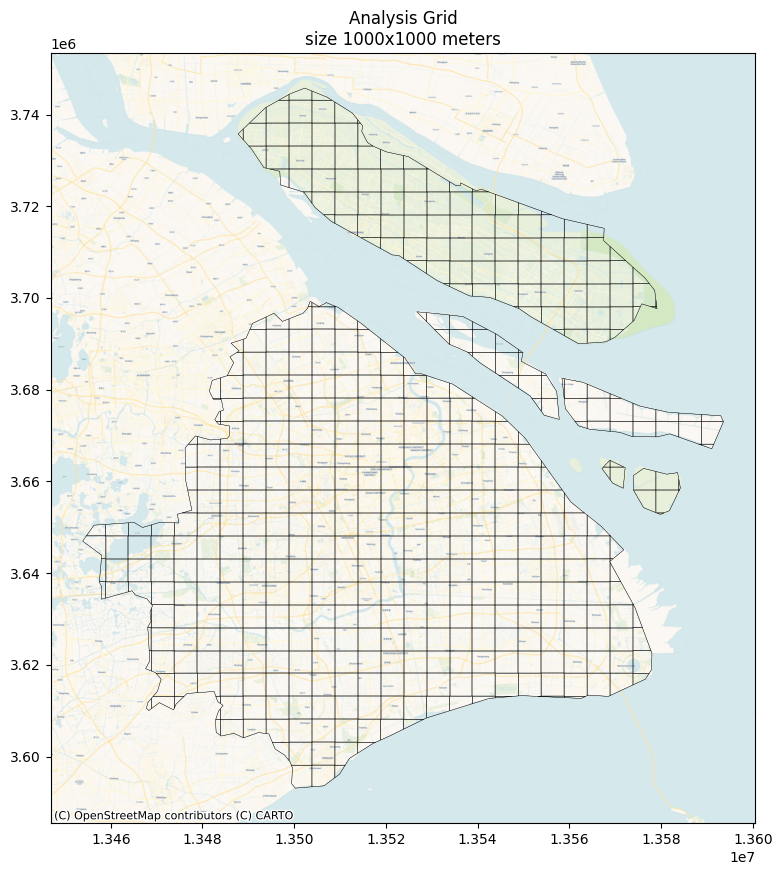

In [ ]:
Shanghai_boundary = gpd.read_file("/content/drive/MyDrive/Capstone/data/上海市_市.geojson")
print(Shanghai_boundary.crs)
Shanghai_boundary = Shanghai_boundary.to_crs('EPSG:3857')

# Shanghai area 6340.5 km2; 214 sub district
grid_size = 5000 # 4000-5000 #老年人出行的舒适范围

# Get boundary coordinates
minx, miny, maxx, maxy = Shanghai_boundary.total_bounds
x_range = maxx - minx
y_range = maxy - miny

# Calculate number of rows and columns
rows = int(y_range / grid_size)
cols = int(x_range / grid_size)

# Create grid cells
grid = []
for i in range(cols + 1):
    for j in range(rows + 1):
        grid.append(box(minx + i * grid_size, miny + j * grid_size, minx + (i + 1) * grid_size, miny + (j + 1) * grid_size))

# Create GeoDataFrame for grid
grid_gdf = gpd.GeoDataFrame(geometry=grid, crs=Shanghai_boundary.crs)

# Clip the grid to the Shanghai boundary
grid_gdf = gpd.clip(grid_gdf, Shanghai_boundary)

# Define a projected CRS (e.g., EPSG:3857 for web maps in meters)
projected_crs = 'EPSG:3857'

# Reproject both boundary and grid to the projected CRS
grid_gdf = grid_gdf.to_crs(projected_crs)
Shanghai_boundary = Shanghai_boundary.to_crs(projected_crs)

# Calculate centroids of the grid cells
centroids = grid_gdf.centroid

# Plot the grid and boundary
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Shanghai boundary and grid
Shanghai_boundary.plot(ax=ax, color='none', edgecolor='black', linewidth=0.1)
grid_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.3)

# Add basemap (make sure to reproject to web mercator)
cx.add_basemap(ax, crs=grid_gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager, zoom=12)

# Set title
plt.title("Analysis Grid\nsize 1000x1000 meters")
plt.show()



EPSG:4490


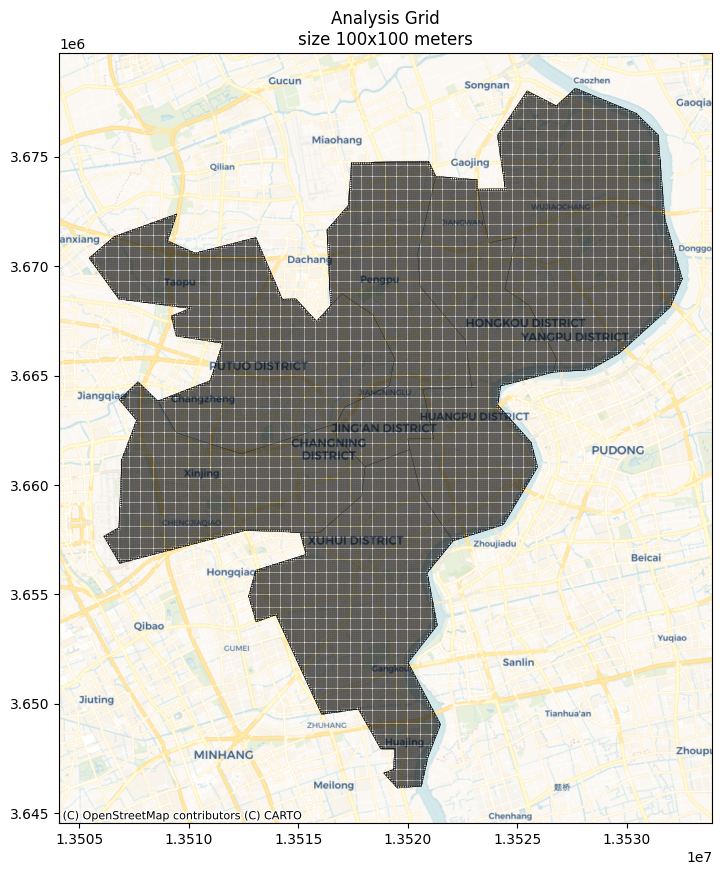

In [ ]:
Shanghai_boundary = gpd.read_file("/content/drive/MyDrive/Capstone/Shanghai_CITY_boundary.json")
print(Shanghai_boundary.crs)
Shanghai_boundary = Shanghai_boundary.to_crs('EPSG:3857')

# Shanghai area 6340.5 km2; 214 sub district
grid_size = 100 # 4000-5000 #老年人出行的舒适范围

# Get boundary coordinates
minx, miny, maxx, maxy = Shanghai_boundary.total_bounds
x_range = maxx - minx
y_range = maxy - miny

# Calculate number of rows and columns
rows = int(y_range / grid_size)
cols = int(x_range / grid_size)

# Create grid cells
grid = []
for i in range(cols + 1):
    for j in range(rows + 1):
        grid.append(box(minx + i * grid_size, miny + j * grid_size, minx + (i + 1) * grid_size, miny + (j + 1) * grid_size))

# Create GeoDataFrame for grid
grid_gdf = gpd.GeoDataFrame(geometry=grid, crs=Shanghai_boundary.crs)

# Clip the grid to the Shanghai boundary
grid_gdf = gpd.clip(grid_gdf, Shanghai_boundary)

# Define a projected CRS (e.g., EPSG:3857 for web maps in meters)
projected_crs = 'EPSG:3857'

# Reproject both boundary and grid to the projected CRS
grid_gdf = grid_gdf.to_crs(projected_crs)
Shanghai_boundary = Shanghai_boundary.to_crs(projected_crs)

# Calculate centroids of the grid cells
centroids = grid_gdf.centroid

# Plot the grid and boundary
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Shanghai boundary and grid
Shanghai_boundary.plot(ax=ax, color='none', edgecolor='black', linewidth=0.1)
grid_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.3)

# Add basemap (make sure to reproject to web mercator)
cx.add_basemap(ax, crs=grid_gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager, zoom=12)

# Set title
plt.title("Analysis Grid\nsize 100x100 meters")
plt.show()


In [ ]:
!pip install libpysal
!pip install spreg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.8/372.8 kB 18.4 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.neighbors import NearestNeighbors
import contextily as cx
from libpysal.weights import KNN
#from pysal.model.spreg import ML_Lag

parks = gpd.read_file('/content/drive/MyDrive/Capstone/data/SH_Urban Park/上海市_公园面/上海市_公园面.shp')

parks_proj = parks.to_crs(projected_crs)

parks_proj

,OBJECTID,osm_id,code,fclass,name,Shape_Leng,Shape_Area,geometry
0,2,1919664,7202,park,世纪公园,0.049105,1.284326e-04,"POLYGON ((13530345.164 3660436.838, 13530241.9..."
1,3,10266313,7202,park,None,0.011172,4.847510e-06,"POLYGON ((13533249.823 3664058.374, 13532799.7..."
2,4,10266362,7202,park,碧天体育公园,0.020211,9.610862e-06,"POLYGON ((13533926.267 3664414.851, 13533617.6..."
3,32,11764264,7202,park,None,0.003390,3.149263e-07,"POLYGON ((13523348.333 3664685.533, 13523260.5..."
4,34,12271429,7202,park,徐家汇公园,0.011969,7.494345e-06,"POLYGON ((13518557.376 3658611.731, 13518285.2..."
...,...,...,...,...,...,...,...,...
1728,15321,1119075350,7202,park,None,0.000788,2.822472e-08,"POLYGON ((13518514.195 3661996.170, 13518496.9..."
1729,15329,1120982537,7202,park,None,0.002772,4.691548e-07,"POLYGON ((13513218.382 3691289.451, 13513154.6..."
1730,15338,1121135973,7202,park,None,0.014395,1.015839e-05,"POLYGON ((13514678.849 3688937.375, 13514539.6..."
1731,15339,1121213455,7202,park,None,0.003017,3.728063e-07,"POLYGON ((13524587.564 3678190.116, 13524462.1..."


In [ ]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 79.6 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [ ]:
import osmnx as ox

# 设置地点名称为上海市
place_name = "Shanghai, China"

# 下载步行网络
walk_network = ox.graph_from_place(place_name, network_type='walk')

# 保存步行网络到 Google Drive
ox.save_graphml(walk_network, '/content/drive/MyDrive/Capstone/data/shanghai_walk_network.graphml')


/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
